# Introdução à Análise de Séries Temporais em Python

### Importar as bibliotecas necessárias

In [2]:
import pandas as pd

## Carregar o conjunto de dados de série temporal corretamente no Pandas

#### Dados: Valor das remessas dos fabricantes para todas as indústrias de manufatura

### Carregar os dados

In [4]:
df = pd.read_csv('UMTMVS.csv')

### Ver o conjunto de dados

In [5]:
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


### Agora indicando que DATE (time) é a coluna index

In [6]:
df = pd.read_csv('UMTMVS.csv', index_col='DATE')
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


#### Série temporal: série de pontos de dados indexados em ordem de tempo

### Ver se o pandas está a lidar com o índice como objetos simples ou tipo de dados Datetime integrado do pandas

In [7]:
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
       '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01'],
      dtype='object', name='DATE', length=349)

### Como está a lidar como objetos simples, é necessário converter para Datetime

In [8]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01'],
              dtype='datetime64[ns]', name='DATE', length=349, freq=None)

#### Nota: está em nanosegundos, e pode-se alterar para dias ou meses.

## Indexação em dados de série temporal

### Obter todos os dados a partir de 2000-01-01 até 2015-01-01

#### Sintaxe: [ 'data de inicio' : 'data de término' ]

In [10]:
df.loc['2000-01-01':'2015-01-01']

,UMTMVS
DATE,
2000-01-01,314656.0
2000-02-01,342744.0
2000-03-01,374859.0
2000-04-01,344093.0
2000-05-01,356402.0
...,...
2014-09-01,512979.0
2014-10-01,505469.0
2014-11-01,458120.0


### Dados a cada 12 meses, de 1992 a 2000

#### Sintaxe: [ 'data de inicio' : 'data de término' : etapa ]

In [11]:
df.loc['1992-01-01':'2000-01-01':12]

,UMTMVS
DATE,
1992-01-01,209438.0
1993-01-01,223258.0
1994-01-01,234097.0
1995-01-01,260175.0
1996-01-01,263041.0
1997-01-01,280870.0
1998-01-01,290004.0
1999-01-01,293222.0
2000-01-01,314656.0


### Reamostragem de tempo (Time-Resampling) usando Pandas

#### Regras importantes para as quais reamostramos o nosso índice de série temporal

M = fim do mês

A = fim do ano

MS = inicio do mês

AS = inicio do ano

### Calcular o valor médio da remessa no inicio de cada ano

In [16]:
df.resample(rule = 'AS').mean().head()

,UMTMVS
DATE,
1992-01-01,242002.000000
1993-01-01,251708.083333
1994-01-01,269842.666667
1995-01-01,289973.083333
1996-01-01,299765.666667


### Calcular a soma de todos os anos com uma função personalizada

In [26]:
def sum_of_year(year_val):
    return year_val.sum()

#### Aplicar por meio de reamostragem:

In [ ]:
df.resample(rule='AS').apply(year_val)

#### Confirmar que está a funcionar corretamente:

In [ ]:
df.resample(rule='AS').apply(my_own_custom) == df.resample(rule='AS').sum()

## Rolling Time-Series

#### Semelhante ao Time-Resampling, mas pegar numa janela de qualquer tamanho e executar uma função nela.
Uma janela rolante do tamanho k significa k valores consecutivos.

### Calcular a média móvel de 10 dias

In [27]:
df.rolling(window=10).mean().head(20) # head to see first 20 values

,UMTMVS
DATE,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN
1992-06-01,NaN
1992-07-01,NaN
1992-08-01,NaN
1992-09-01,NaN


#### Não há valores suficientes para calcular a média móvel para os primeiros 10 valores (meses).

### Verificar o valor máximo numa janela de 30 dias

In [30]:
df.rolling(window=30).max()[30:].head(20)

,UMTMVS
DATE,
1994-07-01,287336.0
1994-08-01,287336.0
1994-09-01,291357.0
1994-10-01,291357.0
1994-11-01,291357.0
1994-12-01,291357.0
1995-01-01,291357.0
1995-02-01,291357.0
1995-03-01,303201.0


## Traçar dados de Série Temporal usando Pandas

#### df.plot - gráfico básico para ver o valor da Remessa de Manufaturas ao longo do tempo

Eixo x - índice de série temporal

Eixo y - valores

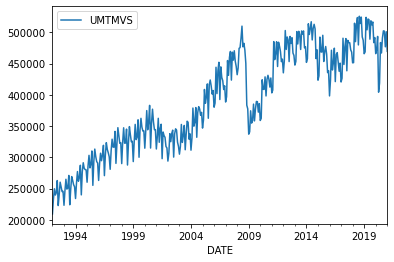

In [31]:
df.plot()

### Adicionar um título e o rótulo y utilizando .set

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Value of Manufacturers Shipments')]

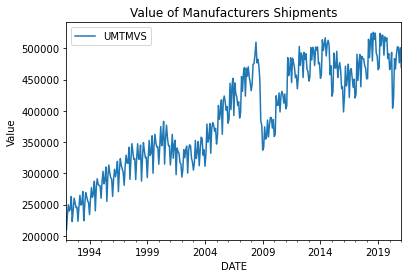

In [32]:
ax = df.plot()
ax.set(title='Value of Manufacturers Shipments', ylabel='Value')

### Alterar o tamanho do gráfico utilizando figsize

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Value of Manufacturers Shipments')]

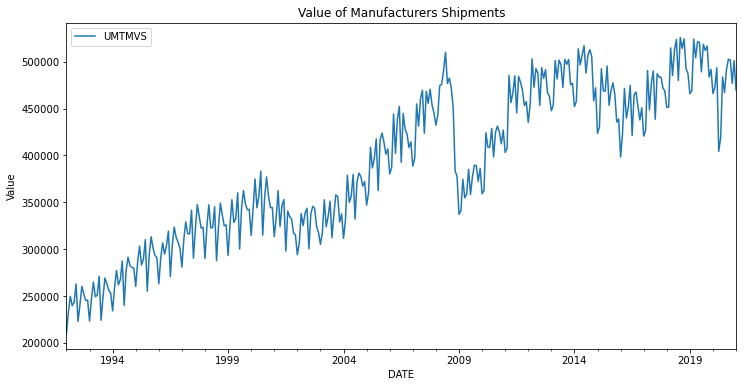

In [33]:
ax = df.plot(figsize=(12,6))
ax.set(title='Value of Manufacturers Shipments', ylabel='Value')

### Representar graficamente a média do valor inicial de cada ano

[Text(0, 0.5, 'Value of Mean of Starting of Year'),
 Text(0.5, 1.0, 'Average of Manufacturers Shipments')]

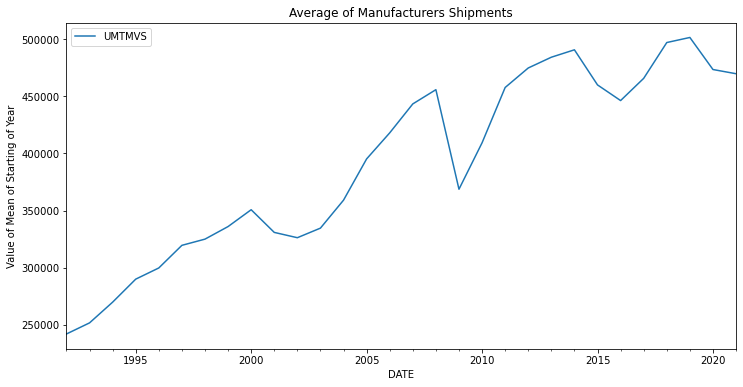

In [34]:
ax = df.resample(rule='AS').mean().plot(figsize=(12,6))
ax.set(title='Average of Manufacturers Shipments', ylabel='Value of Mean of Starting of Year')

### Gráfico de barras para a média de inicio de cada ano chamando .bar em cima de .plot

[Text(0, 0.5, 'Value of Mean of Starting of Year'),
 Text(0.5, 1.0, 'Average of Manufacturers Shipments')]

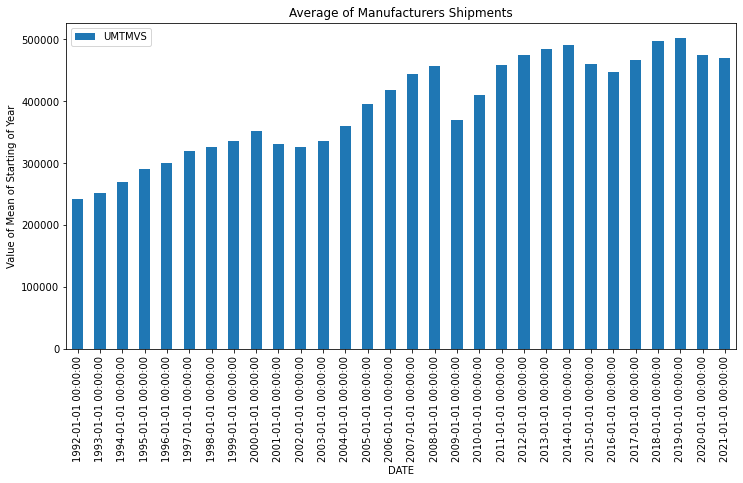

In [35]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))
ax.set(title='Average of Manufacturers Shipments', ylabel='Value of Mean of Starting of Year')

### Traçar a média móvel e a média normal para o inicio do mês

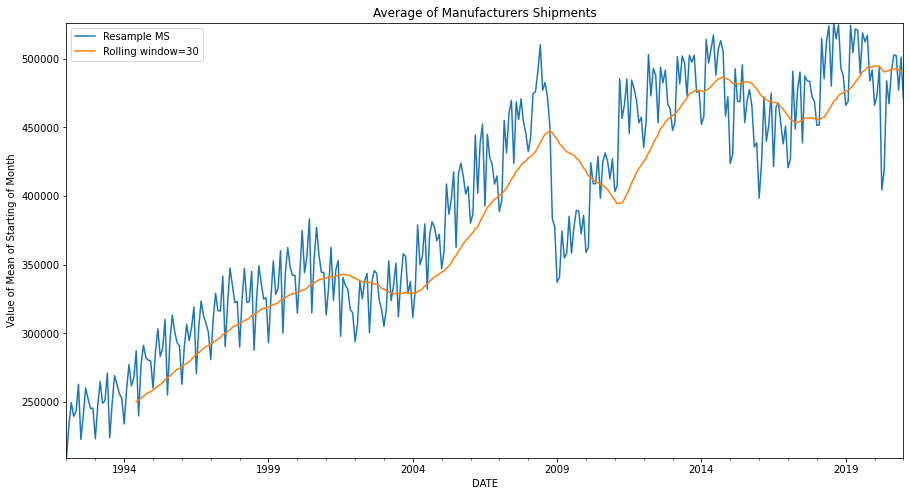

In [38]:
ax = df['UMTMVS'].resample(rule='MS').mean().plot(figsize=(15,8), label='Resample MS')
ax.autoscale(tight=True)
df.rolling(window=30).mean()['UMTMVS'].plot(label='Rolling window=30')

ax.set(ylabel='Value of Mean of Starting of Month',title='Average of Manufacturers Shipments')
ax.legend()

### Traçar para datas especificas de acordo com a escolha pessoal

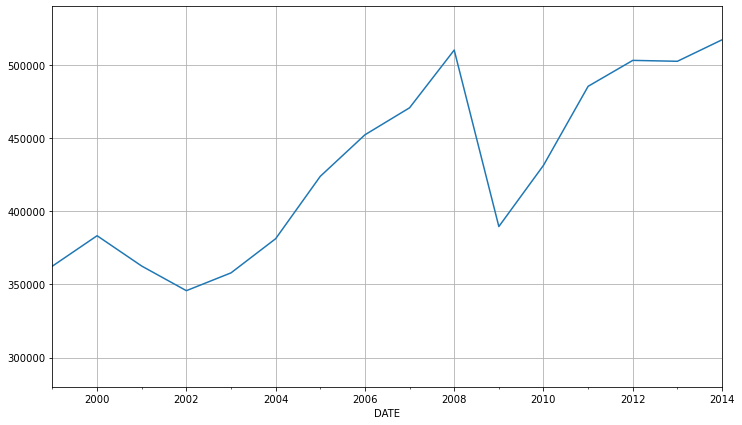

In [37]:
ax = df['UMTMVS'].resample(rule='AS').max().plot(xlim=["1999-01-01","2014-01-01"],ylim=[280000,540000], figsize=(12,7))
ax.yaxis.grid(True)
ax.xaxis.grid(True)